Time Series

About the Data

In this notebook, we will be working with 5 data sets:

(CSV) Facebook's stock price daily throughout 2018 (obtained using the stock_analysis package).
(CSV) Facebook's OHLC stock data from May 20, 2019 - May 24, 2019 per minute from Nasdaq.com.
(CSV) melted stock data for Facebook from May 20, 2019 - May 24, 2019 per minute from Nasdaq.com.
(DB) stock opening prices by the minute for Apple from May 20, 2019 - May 24, 2019 altered to have seconds in the time from Nasdaq.com.
(DB) stock opening prices by the minute for Facebook from May 20, 2019 - May 24, 2019 from Nasdaq.com.

In [1]:
import numpy as np
import pandas as pd
fb = pd.read_csv('fb_2018.csv', index_col='date', parse_dates=True).assign(
trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


Time-based selection and filtering

Remember, when we have a DatetimeIndex , we can use datetime slicing. We can provide a range of dates. We only get three days back because the stock market is closed on the weekends:

In [2]:
fb['2018-10-11':'2018-10-15']

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-10-11,150.13,154.81,149.1600,153.35,35338901,low
2018-10-12,156.73,156.89,151.2998,153.74,25293492,low
2018-10-15,153.32,155.57,152.5500,153.52,15433521,low


In [3]:

fb.loc['2018-Q1'].equals(fb['2018-01':'2018-03'])

True

In [4]:

fb.first('1W')

<ipython-input-4-db06dd381446>:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first('1W')


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low


In [5]:
fb.last('1W')

<ipython-input-5-72731dd004c8>:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.last('1W')


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-12-31,134.45,134.64,129.95,131.09,24625308,low


In [6]:
stock_data_per_minute = pd.read_csv(
 'fb_week_of_may_20_per_minute.csv', index_col='date', parse_dates=True,
 date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H-%M')
)
stock_data_per_minute.head()

<ipython-input-6-0de5ac54e2f0>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  stock_data_per_minute = pd.read_csv(


,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


In [7]:
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
'open': 'first',
'high': 'max',
'low': 'min',
'close': 'last',
'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


In [8]:
stock_data_per_minute.at_time('9:30')

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.0
2019-05-21 09:30:00,184.53,184.53,184.53,184.53,58171.0
2019-05-22 09:30:00,184.81,184.81,184.81,184.81,41585.0
2019-05-23 09:30:00,182.50,182.50,182.50,182.50,121930.0
2019-05-24 09:30:00,182.33,182.33,182.33,182.33,52681.0


In [9]:
stock_data_per_minute.between_time('15:59', '16:00')

,open,high,low,close,volume
date,,,,,
2019-05-20 15:59:00,182.915,182.915,182.915,182.915,134569.0
2019-05-20 16:00:00,182.720,182.720,182.720,182.720,1113672.0
2019-05-21 15:59:00,184.840,184.840,184.840,184.840,61606.0
2019-05-21 16:00:00,184.820,184.820,184.820,184.820,801080.0
2019-05-22 15:59:00,185.290,185.290,185.290,185.290,96099.0
2019-05-22 16:00:00,185.320,185.320,185.320,185.320,1220993.0
2019-05-23 15:59:00,180.720,180.720,180.720,180.720,109648.0
2019-05-23 16:00:00,180.870,180.870,180.870,180.870,1329217.0
2019-05-24 15:59:00,181.070,181.070,181.070,181.070,52994.0


On average, are more shares traded within the first 30 minutes of trading or in the last 30 minutes? We can combine between_time() with Groupers and filter() from the aggregation.ipynb notebook to answer this question. For the week in question, more are traded on average around opening time than closing time:

In [10]:
shares_traded_in_first_30_min = stock_data_per_minute\
    .between_time('9:30', '10:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .filter(lambda x: (x.volume > 0).all())\
    .volume.mean()
shares_traded_in_last_30_min = stock_data_per_minute\
    .between_time('15:30', '16:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .filter(lambda x: (x.volume > 0).all())\
    .volume.mean()
shares_traded_in_first_30_min - shares_traded_in_last_30_min

np.float64(18592.967741935485)

In [11]:
pd.DataFrame(
dict(before=stock_data_per_minute.index, after=stock_data_per_minute.index.normalize())
).head()

,before,after
0,2019-05-20 09:30:00,2019-05-20
1,2019-05-20 09:31:00,2019-05-20
2,2019-05-20 09:32:00,2019-05-20
3,2019-05-20 09:33:00,2019-05-20
4,2019-05-20 09:34:00,2019-05-20


In [12]:
stock_data_per_minute.index.to_series().dt.normalize().head()

,date
date,
2019-05-20 09:30:00,2019-05-20
2019-05-20 09:31:00,2019-05-20
2019-05-20 09:32:00,2019-05-20
2019-05-20 09:33:00,2019-05-20
2019-05-20 09:34:00,2019-05-20



Shifting for lagged data

We can use shift() to create some lagged data. By default, the shift will be one period. For example, we can use shift() to create a new column that indicates the previous day's closing price. From this new column, we can calculate the price change due to after hours trading (after the close one day right up to the open the following day):

In [13]:
fb.assign(
prior_close=lambda x: x.close.shift(),
after_hours_change_in_price=lambda x: x.open - x.prior_close,
abs_change=lambda x: x.after_hours_change_in_price.abs()
).nlargest(5, 'abs_change')

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,high,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,med,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,med,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,low,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,med,185.09,-8.08,8.08


In [14]:
pd.date_range('2018-01-01', freq='D', periods=5) + pd.Timedelta('9 hours 30 minutes')

DatetimeIndex(['2018-01-01 09:30:00', '2018-01-02 09:30:00',
               '2018-01-03 09:30:00', '2018-01-04 09:30:00',
               '2018-01-05 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [15]:
fb.index = pd.to_datetime(fb.index)
first_valid = fb.loc['2018-09'].first_valid_index()
print(first_valid)

2018-09-04 00:00:00


In [17]:
last_valid = fb.loc['2018-09'].last_valid_index()
print(last_valid)

2018-09-28 00:00:00


In [20]:
exists = fb.index.isin([pd.Timestamp('2018-09-30')])
print(exists.any())

False


In [21]:
fb.asof('2018-09-30')

,2018-09-30
open,168.33
high,168.79
low,162.56
close,164.46
volume,34265638
trading_volume,low


Differenced data

Using the diff() method is a quick way to calculate the difference between the data and a lagged version of it. By default, it will yield the result of data - data.shift() :

In [24]:
(fb.drop(columns='trading_volume')
    - fb.drop(columns='trading_volume').shift()
).equals(
    fb.drop(columns='trading_volume').diff())

True

In [25]:
fb.drop(columns='trading_volume').diff().head()

,open,high,low,close,volume
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,4.20,3.20,3.7800,3.25,-1265340.0
2018-01-04,3.02,1.43,2.7696,-0.34,-3005667.0
2018-01-05,0.69,0.69,0.8304,2.52,-306361.0
2018-01-08,1.61,2.00,1.4000,1.43,4420191.0


In [26]:
fb.drop(columns='trading_volume').diff(-3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,-7.91,-5.32,-7.3800,-5.43,4577368.0
2018-01-03,-5.32,-4.12,-5.0000,-3.61,-1108163.0
2018-01-04,-3.80,-2.59,-3.0004,-3.54,1487839.0
2018-01-05,-1.35,-0.99,-0.7000,-0.99,3044641.0
2018-01-08,-1.20,0.50,-1.0500,0.51,8406139.0


Resampling

Sometimes the data is at a granularity that isn't conducive to our analysis. Consider the case where we have data per minute for the full year of 2018. Let's see what happens if we try to plot this. Plotting will be covered in the next module, so don't worry too much about the code. First, we import matplotlib for plotting:

In [27]:

import matplotlib.pyplot as plt

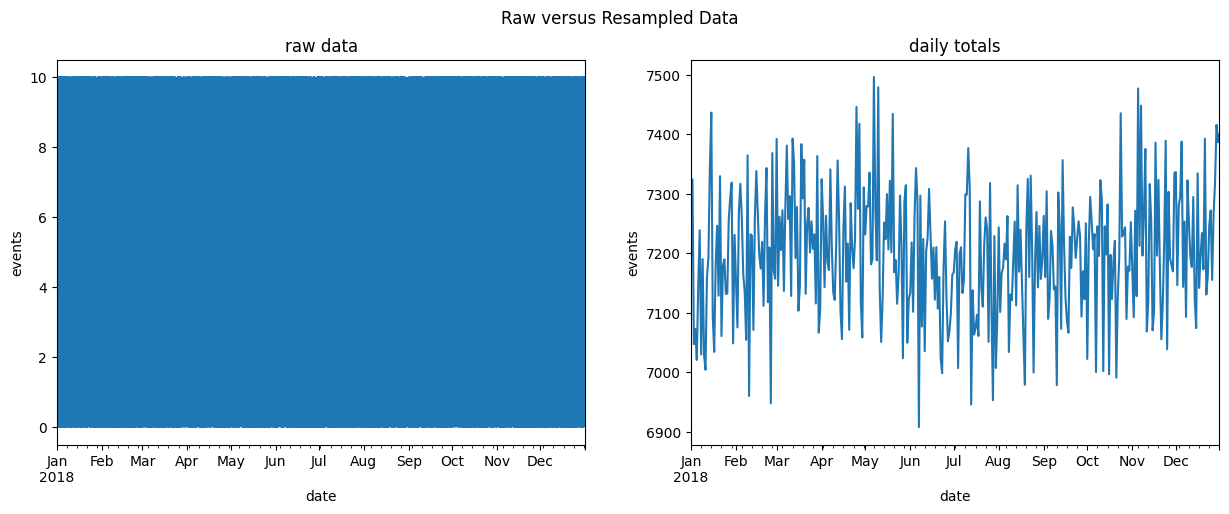

In [28]:
np.random.seed(0)
index = pd.date_range('2018-01-01', freq='min', periods=365*24*60)
raw = pd.DataFrame(
    np.random.uniform(0, 10, size=index.shape[0]), index=index
)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
raw.plot(legend=False, ax=axes[0], title='raw data')
raw.resample('1D').sum().plot(legend=False, ax=axes[1], title='daily totals')
for ax in axes:
    ax.set_xlabel('date')
    ax.set_ylabel('events')
plt.suptitle('Raw versus Resampled Data')
plt.show()

In [29]:
stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


In [30]:
stock_data_per_minute.resample('1D').agg({
'open': 'first',
'high': 'max',
'low': 'min',
'close': 'last',
'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


In [32]:
fb_numeric = fb.select_dtypes(include=['number'])

fb_resampled = fb_numeric.resample('QE').mean()
fb_resampled

,open,high,low,close,volume
date,,,,,
2018-03-31,179.472295,181.794659,177.040428,179.551148,3.292640e+07
2018-06-30,180.373770,182.277689,178.595964,180.704688,2.405532e+07
2018-09-30,180.812130,182.890886,178.955229,181.028492,2.701982e+07
2018-12-31,145.272460,147.620121,142.718943,144.868730,2.697433e+07


In [33]:
fb.drop(columns='trading_volume').resample('QE').apply(
    lambda x: x.loc[x.index[-1]] - x.loc[x.index[0]]
)

,open,high,low,close,volume
date,,,,,
2018-03-31,-22.53,-20.1600,-23.410,-21.63,41282390
2018-06-30,39.51,38.3997,39.844,38.93,-20984389
2018-09-30,-25.04,-28.6600,-29.660,-32.90,20304060
2018-12-31,-28.58,-31.2400,-31.310,-31.35,-1782369


In [34]:
melted_stock_data = pd.read_csv('melted_stock_data.csv', index_col='date', parse_dates=True)
melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.6200
2019-05-20 09:31:00,182.6100
2019-05-20 09:32:00,182.7458
2019-05-20 09:33:00,182.9500
2019-05-20 09:34:00,183.0600


In [35]:
melted_stock_data.resample('1D').ohlc()['price']

,open,high,low,close
date,,,,
2019-05-20,181.62,184.1800,181.6200,182.72
2019-05-21,184.53,185.5800,183.9700,184.82
2019-05-22,184.81,186.5603,184.0120,185.32
2019-05-23,182.50,183.7300,179.7559,180.87
2019-05-24,182.33,183.5227,181.0400,181.06


In [36]:
fb.resample('6h').asfreq().head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.0,low


In [37]:
fb.resample('6h').ffill().head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 06:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 12:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 18:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563,low


In [38]:
fb.resample('6h').fillna('nearest').head()

<ipython-input-38-fb9a9baf1cb5>:1: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  fb.resample('6h').fillna('nearest').head()


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 06:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 12:00:00,181.88,184.78,181.33,184.67,16886563,low
2018-01-02 18:00:00,181.88,184.78,181.33,184.67,16886563,low
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563,low


In [39]:
fb.resample('6H').asfreq().assign(
volume=lambda x: x.volume.fillna(0), # put 0 when market is closed
close=lambda x: x.close.fillna(method='ffill'), # carry forward
# take the closing price if these aren't available
open=lambda x: np.where(x.open.isnull(), x.close, x.open),
high=lambda x: np.where(x.high.isnull(), x.close, x.high),
low=lambda x: np.where(x.low.isnull(), x.close, x.low)
).head()

<ipython-input-39-711fa8cf8c9d>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fb.resample('6H').asfreq().assign(
<ipython-input-39-711fa8cf8c9d>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close=lambda x: x.close.fillna(method='ffill'), # carry forward


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-02 06:00:00,181.42,181.42,181.42,181.42,0.0,NaN
2018-01-02 12:00:00,181.42,181.42,181.42,181.42,0.0,NaN
2018-01-02 18:00:00,181.42,181.42,181.42,181.42,0.0,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.0,low


Merging

We saw merging examples the querying_and_merging notebook. However, they all matched based on keys. With time series, it is possible that they are so granular that we never have the same time for multiple entries. Let's work with some stock data at different granularities:

In [52]:
import sqlite3
with sqlite3.connect('stocks.db') as connection:
 fb_prices = pd.read_sql(
 'SELECT * FROM fb_prices', connection,
 index_col='date', parse_dates=['date']
 )
 aapl_prices = pd.read_sql(
 'SELECT * FROM aapl_prices', connection,
 index_col='date', parse_dates=['date']
 )

In [53]:
fb_prices.index.second.unique()

Index([0], dtype='int32', name='date')

In [54]:
aapl_prices.index.second.unique()

Index([0], dtype='int32', name='date')

In [55]:
pd.merge_asof(
    fb_prices, aapl_prices,
    left_index=True, right_index=True, # datetimes are in the index
    # merge with nearest minute
    direction='nearest', tolerance=pd.Timedelta(30, unit='s')
).head()

,price_x,price_y
date,,
2023-10-27,150.0,170.0
2023-10-28,152.5,171.5


In [56]:
pd.merge_ordered(
    fb_prices.reset_index(), aapl_prices.reset_index()
).set_index('date').head()

,price
date,
2023-10-27,150.0
2023-10-27,170.0
2023-10-28,152.5
2023-10-28,171.5


In [57]:
pd.merge_ordered(
    fb_prices.reset_index(), aapl_prices.reset_index(),
    fill_method='ffill'
).set_index('date').head()

,price
date,
2023-10-27,150.0
2023-10-27,170.0
2023-10-28,152.5
2023-10-28,171.5
